## Importing Dependencies

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os
import cv2
import imghdr
import pathlib
import PIL
import PIL.Image
import numpy as np

In [16]:
# setting up the dataset path to leafsnap-random-20-merged
data_dir = r"C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Team-6_Plant-Species-Identification\Algeria-Chapter-Green\Team-6_project\src\tasks\task-1-filtering-data\leafsnap-random-20-merged"
data_dir

'C:\\Users\\Vishal Sahni\\Desktop\\TUTORIALS\\Omdena\\Plant-Species-Identification-main\\src\\tasks\\task-1-filtering-data\\leafsnap-20-final-dataset\\leafsnap-random-20-merged'

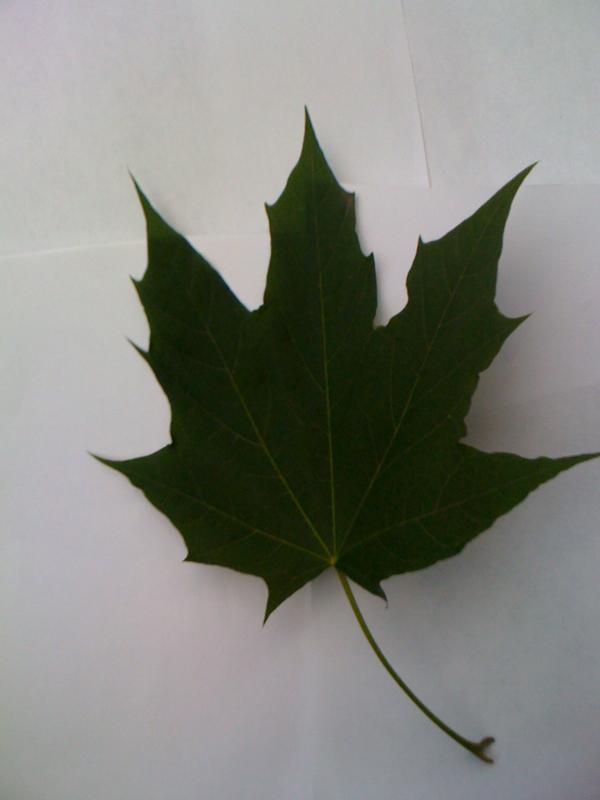

In [24]:
img = tf.keras.preprocessing.image.load_img(f"{data_dir}/acer_platanoides/1249316899_0004.jpg")
img

In [26]:
data_dir = pathlib.Path(data_dir)
print(data_dir)

C:\Users\Vishal Sahni\Desktop\TUTORIALS\Omdena\Plant-Species-Identification-main\src\tasks\task-1-filtering-data\leafsnap-20-final-dataset\leafsnap-random-20-merged


In [29]:
img_class = os.listdir(data_dir)
print(f"total classes are: {len(img_class)}")
img_class

total classes are: 20


['abies_concolor',
 'acer_platanoides',
 'koelreuteria_paniculata',
 'liquidambar_styraciflua',
 'magnolia_soulangiana',
 'magnolia_virginiana',
 'malus_coronaria',
 'metasequoia_glyptostroboides',
 'morus_rubra',
 'pinus_bungeana',
 'prunus_yedoensis',
 'quercus_acutissima',
 'quercus_falcata',
 'quercus_imbricaria',
 'quercus_palustris',
 'quercus_rubra',
 'robinia_pseudo-acacia',
 'sassafras_albidum',
 'tilia_americana',
 'ulmus_rubra']

In [31]:
# checking image count for each class
for class_name in img_class:
    print(f"{class_name} image count are: {len(os.listdir(os.path.join(data_dir,class_name)))}")

abies_concolor image count are: 247
acer_platanoides image count are: 136
koelreuteria_paniculata image count are: 190
liquidambar_styraciflua image count are: 162
magnolia_soulangiana image count are: 52
magnolia_virginiana image count are: 174
malus_coronaria image count are: 147
metasequoia_glyptostroboides image count are: 168
morus_rubra image count are: 135
pinus_bungeana image count are: 170
prunus_yedoensis image count are: 133
quercus_acutissima image count are: 165
quercus_falcata image count are: 56
quercus_imbricaria image count are: 139
quercus_palustris image count are: 131
quercus_rubra image count are: 67
robinia_pseudo-acacia image count are: 141
sassafras_albidum image count are: 128
tilia_americana image count are: 155
ulmus_rubra image count are: 313


## Creating a dataset

In [32]:
batch_size = 32
img_height = 180
img_width = 180

In [33]:
# Training set

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, # location of directory where data labels are folder name
    validation_split = 0.2, # split the 20% data for validation and 80% for training
    subset = 'training', # setting value (training or validation)
    seed = 12, # its a seed number for random initialization
    image_size = (img_height, img_width), # setting  up the image height and width
    batch_size = (batch_size) # setting the batch size
)

Found 3009 files belonging to 20 classes.
Using 2408 files for training.


In [34]:
# Validation set

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, # location of directory where data labels are folder name
    validation_split = 0.2, # split the 20% data for validation and 80% for training
    subset = 'validation', # setting value (training or validation)
    seed = 12, # its a seed number for random initialization
    image_size = (img_height, img_width), # setting  up the image height and width
    batch_size = (batch_size) # setting the batch size
)

Found 3009 files belonging to 20 classes.
Using 601 files for validation.


In [35]:
class_names = train_ds.class_names
class_names

['abies_concolor',
 'acer_platanoides',
 'koelreuteria_paniculata',
 'liquidambar_styraciflua',
 'magnolia_soulangiana',
 'magnolia_virginiana',
 'malus_coronaria',
 'metasequoia_glyptostroboides',
 'morus_rubra',
 'pinus_bungeana',
 'prunus_yedoensis',
 'quercus_acutissima',
 'quercus_falcata',
 'quercus_imbricaria',
 'quercus_palustris',
 'quercus_rubra',
 'robinia_pseudo-acacia',
 'sassafras_albidum',
 'tilia_americana',
 'ulmus_rubra']

In [36]:
num_classes = len(class_names)
num_classes

20

## Visualising the data

In [37]:
import matplotlib.pyplot as plt
print(train_ds.take(1))

<TakeDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


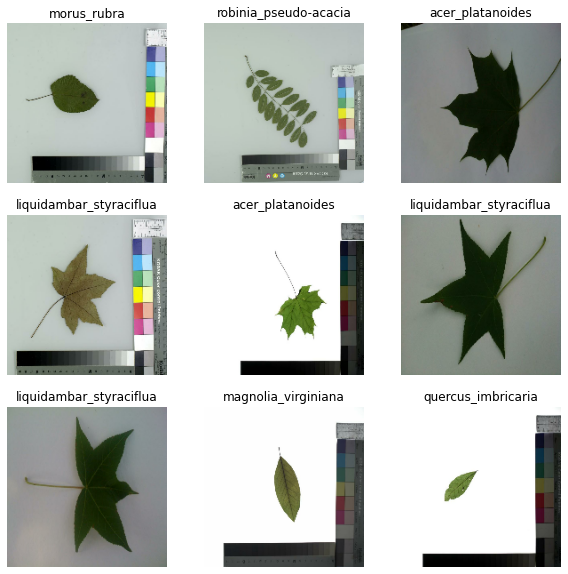

In [38]:
plt.figure(figsize=(10,10))
for image, label in train_ds.take(1):
      for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("int"))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [39]:
print(len(train_ds))
for image_batch, label_batch in train_ds:
    print(image_batch.shape)
    print(label_batch.shape)
    break

76
(32, 180, 180, 3)
(32,)


## Configuring the dataset for performance

In [40]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(200).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

## Transfer Learning using VGG16 pretrained model

In [42]:
from tensorflow.keras.applications import VGG16 #VGG16 pretrained model

vgg = VGG16(include_top= False)
vgg.trainable = False

# Data augmentation with following 4 augmentation we created 4 times of our data.
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal',input_shape = (img_height, img_width,3)),
        layers.RandomContrast(0.2,seed = 12),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)

    ]
)

In [22]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## Model building

In [44]:
"""Building the model For transfer learning"""

model = Sequential(
    [
        data_augmentation,
        layers.Rescaling(1./255),
        vgg,
        layers.Flatten(),
        layers.Dense(205, keras.layers.LeakyReLU(alpha=0.01)),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='Softmax')
    ]
)

## Model compilation

In [47]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 205)               2624205   
                                                                 
 dropout (Dropout)           (None, 205)               0         
                                                                 
 dense_1 (Dense)             (None, 20)               

## Training the Model

In [26]:
epochs = 11
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/11
76/76 [==============================] - 30s 169ms/step - loss: 1.4983 - accuracy: 0.5486 - val_loss: 0.6153 - val_accuracy: 0.8286
Epoch 2/11
76/76 [==============================] - 10s 129ms/step - loss: 0.6012 - accuracy: 0.8160 - val_loss: 0.3316 - val_accuracy: 0.9218
Epoch 3/11
76/76 [==============================] - 10s 130ms/step - loss: 0.4345 - accuracy: 0.8613 - val_loss: 0.2470 - val_accuracy: 0.9268
Epoch 4/11
76/76 [==============================] - 10s 131ms/step - loss: 0.3661 - accuracy: 0.8804 - val_loss: 0.2206 - val_accuracy: 0.9268
Epoch 5/11
76/76 [==============================] - 10s 133ms/step - loss: 0.2888 - accuracy: 0.9057 - val_loss: 0.1742 - val_accuracy: 0.9468
Epoch 6/11
76/76 [==============================] - 10s 135ms/step - loss: 0.2670 - accuracy: 0.9128 - val_loss: 0.1859 - val_accuracy: 0.9501
Epoch 7/11
76/76 [==============================] - 10s 135ms/step - loss: 0.2368 - accuracy: 0.9223 - val_loss: 0.1294 - val_accuracy: 0.9584

## Model Validation

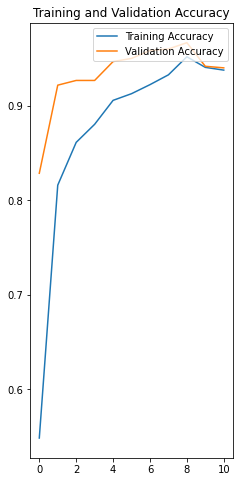

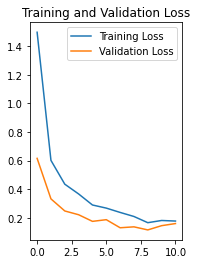

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'upper right')
plt.title("Training and Validation Accuracy")
plt.show()

plt.subplot(1,2,1)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title("Training and Validation Loss")

plt.show()

## Testing the VGG16

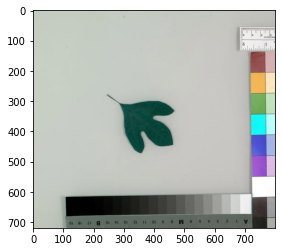

In [38]:
img = cv2.imread('/content/leafsnap-20-final-dataset/testing-leafsnap-random-20-merged/sassafras_albidum/wb1043-01-1.jpg')
plt.imshow(img)
plt.show()

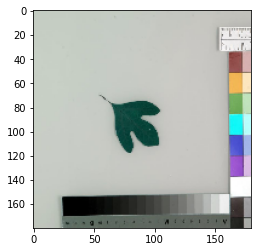

In [39]:
resize = tf.image.resize(img, (180,180))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
prediction = model.predict(np.expand_dims(resize/255, 0))
# print(np.expand_dims(resize/255, 0))
for i,v in enumerate(prediction[0]):
  print(f"the index is: {i}, the prediction is {v*100}%\n")

the index is: 0, the prediction is 74.98830556869507%

the index is: 1, the prediction is 0.02617940481286496%

the index is: 2, the prediction is 0.6141643971204758%

the index is: 3, the prediction is 0.027206868981011212%

the index is: 4, the prediction is 0.0001333127670477552%

the index is: 5, the prediction is 0.19128890708088875%

the index is: 6, the prediction is 0.015160308976192027%

the index is: 7, the prediction is 16.767975687980652%

the index is: 8, the prediction is 0.008077474194578826%

the index is: 9, the prediction is 0.13160831294953823%

the index is: 10, the prediction is 0.04840288020204753%

the index is: 11, the prediction is 0.0009122263691097032%

the index is: 12, the prediction is 5.26496134698391%

the index is: 13, the prediction is 0.13165556592866778%

the index is: 14, the prediction is 0.014391334843821824%

the index is: 15, the prediction is 0.003384161027497612%

the index is: 16, the prediction is 0.038159271935001016%

the index is: 17, the